# Test Jarvis Patrick and SNN methods

In [1]:
import numpy as np
import scipy as sp
import sys
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import mymetrics
import jp
%autoreload 2

## 1. JP: simple 2D

Basic Jarvis Patrick method. See Jarvis, R. A.; Patrick, E. A. Clustering Using a Similarity Measure Based on Shared Nearest Neighbors IEEE Trans. Comput. 1973, C22, 1025-1034.

Calculate the set of $K$ nearest neighbors for each structure. Note that the structure is set as its $0^{th}$ neighbor. Two structures cluster together if:
- they are in each others list of nearest neighbors
- they have at least $K_{min}$ of their $K$ nearest neighbors in common.

In [3]:
Xsimple = np.array((\
    (1,1),\
    (4,1),(5,2),(4.5,2.5),\
    (6,6),\
    (1,5),(1.5,6),(2,6.5)\
))

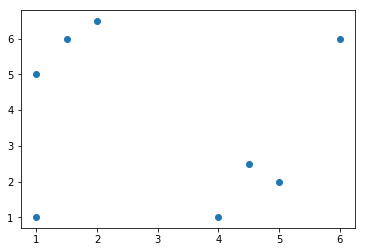

In [4]:
plt.scatter(Xsimple[:,0],Xsimple[:,1])

In [5]:
my_estimator = jp.jarvis_patrick(K=3,Kmin=2,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple)
ncl, nn, cl

Ad. matrix
 [[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]]
elem., assigned, noise
0 [] [0 4]
2 [1, 2, 3] [0 4]
3 [1, 2, 3] [0 4]
4 [1, 2, 3] [0 4]
6 [1, 2, 3, 5, 6, 7] [0 4]
7 [1, 2, 3, 5, 6, 7] [0 4]


(2, 2, array([-1,  0,  0,  0, -1,  1,  1,  1]))

## 2 JP: 2D blobs, circles, moons

In [19]:
np.random.seed(0)
n_samples = 600

nexample = 4
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons   = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs         = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure  = np.random.rand(n_samples, 2), None
#
DATA = list((noisy_circles,noisy_moons,blobs,no_structure))
for i in DATA:
    print(i[0].shape)

(600, 2)
(600, 2)
(600, 2)
(600, 2)


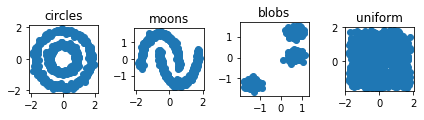

In [20]:
titles = ("circles","moons","blobs","uniform")
fig, axs = plt.subplots(1, 4)
for i in range(nexample):
    data = sklearn.preprocessing.StandardScaler().fit_transform(DATA[i][0])
    x = data[:,0]
    y = data[:,1]
    axs[i].scatter(x,y)
    axs[i].set_title(titles[i])
    axs[i].set_aspect('equal', 'box')
    DATA[i] = data
fig.tight_layout()

### 2.1 circles

In [54]:
X = DATA[0]
my_estimator = jp.jarvis_patrick(K=20,Kmin=3,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

Ad. matrix
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
elem., assigned, noise
members 0 [  0   6   8  48  65  80  90  96 107 117 236 237 303 310 316 331 361 497
 558 583]
members 1 [  1  34 120 134 193 218 270 290 301 315 351 430 444 452 492 520 523 552
 567 584]
members 2 [  2  51  75 130 131 153 196 280 299 344 371 386 400 413 419 424 427 446
 488 540]
members 3 [  3  16  21  24  59  73 178 254 283 286 311 317 329 353 462 480]
members 4 [  4  38  81  84  93 170 173 261 280 386 400 408 413 416 418 424 427 433
 518 546]
members 5 [  5  64  77  92 135 184 205 274 297 324 345 383 410 496 557 566 589]
6 [0, 6, 8, 48, 65, 80, 90, 96, 107, 117, 236, 237, 303, 310, 316, 331, 361, 497, 558, 583, 0, 1, 34, 120, 134, 193, 218, 270, 290, 301, 315, 351, 430, 444, 452, 492, 520, 523, 552, 567, 584, 1, 2, 51, 75, 130, 131, 153, 196, 280, 299, 344, 371, 386, 400, 413, 419, 424, 427, 446, 488, 540, 2, 3, 16, 21, 24, 59, 73, 

342 [0, 6, 8, 48, 65, 80, 90, 96, 107, 117, 236, 237, 303, 310, 316, 331, 361, 497, 558, 583, 0, 1, 34, 120, 134, 193, 218, 270, 290, 301, 315, 351, 430, 444, 452, 492, 520, 523, 552, 567, 584, 1, 2, 51, 75, 130, 131, 153, 196, 280, 299, 344, 371, 386, 400, 413, 419, 424, 427, 446, 488, 540, 2, 3, 16, 21, 24, 59, 73, 178, 254, 283, 286, 311, 317, 329, 353, 462, 480, 3, 4, 38, 81, 84, 93, 170, 173, 261, 280, 386, 400, 408, 413, 416, 418, 424, 427, 433, 518, 546, 4, 5, 64, 77, 92, 135, 184, 205, 274, 297, 324, 345, 383, 410, 496, 557, 566, 589, 5, 7, 58, 78, 126, 144, 268, 325, 356, 360, 368, 395, 412, 436, 448, 465, 485, 491, 525, 527, 571, 7, 9, 149, 160, 191, 204, 238, 244, 264, 269, 271, 276, 307, 318, 357, 404, 431, 449, 458, 460, 572, 9, 10, 42, 118, 206, 223, 224, 247, 252, 262, 266, 267, 285, 338, 443, 474, 475, 483, 508, 555, 591, 10, 11, 68, 116, 124, 148, 162, 168, 208, 209, 221, 222, 227, 312, 330, 337, 362, 381, 479, 548, 592, 11, 12, 18, 57, 71, 113, 140, 160, 191, 210, 232

AssertionError: 

In [ ]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

### 2.2 moons

In [10]:
X = DATA[1]
my_estimator = jp.jarvis_patrick(K=200,Kmin=200,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(102,
 764,
 array([ -1,  -1,   0,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   1,  -1,  -1,
         -1,  -1,  -1,  -1,   2,   3,  -1,   4,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   5,
         -1,  -1,   6,  -1,   7,  -1,  -1,  -1,   8,   9,  -1,  -1,  -1,
         10,  11,  -1,  -1,  -1,  -1,  -1,  -1,  12,  -1,  13,  14,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  15,  16,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  17,  -1,  -1,  18,  -1,  -1,  -1,  -1,  19,  -1,
         -1,  20,  -1,  -1,  -1,  -1,  -1,  -1,  21,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,   5,  -1,  -1,  -1,  -1,  -1,  22,  23,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  24,  25,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  26,  -1,  -1,  -1,  -1,  27,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  28,  29,  -1,  -1,  -1,  30,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  31,  -1,  -1,  

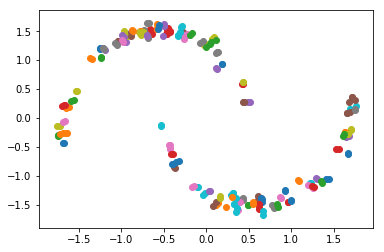

In [11]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

**Conclusion**: see above. Break even point at 300,300

### 2.3 blobs

In [12]:
X = DATA[2]
my_estimator = jp.jarvis_patrick(K=350,Kmin=350,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(55,
 45,
 array([ 0,  1,  2,  3, -1,  4,  5,  1,  3,  6,  7,  8,  9, 10, 11, 12, 12,
         1, 13, 14, -1, 12, 15,  1, 16,  1,  1,  1,  1,  1,  7,  1, 17, 18,
         1, 12,  8,  1, 11, 11, 19,  1, 17, 20,  3,  1, 17, 21,  1, 22, 23,
        22, 24, 22,  1,  1, 11,  1, 23,  8,  5, 17,  5, 16,  1, 15, 21, -1,
        23, -1, 24,  9,  5,  1,  5,  5,  1, 14,  1,  3, 16,  1, 21, -1,  1,
         1,  1, 25, 26,  5, 13, 27, 28, 25, 17, 25, 29, 14,  4, 14,  7,  9,
        30, 27,  1, 21, 24, 31, 21,  5,  1, 18,  9,  7, 27,  1,  1, 17,  7,
        14, 17, 16, 17, 32,  1,  7, 33,  5, -1, -1, 34, 17,  3, 27, 24,  1,
        -1, 29, 35, 36,  8, 16,  7,  1, 17,  1,  1, 17, 27, 14, 17, 37, 10,
        17,  1, 24, 17,  6, 33,  1, 36, 18,  5,  1,  1, 33,  5, 15,  1, 34,
         1, 11,  1,  0,  5, 18, 15,  1, 33, 34, 14, -1, 14,  9, 17,  3,  5,
        15,  1, 27, 17,  1,  7,  1, -1,  5, 11, 29, 22, 38, 14,  1,  3, 15,
         5,  1,  1, 29,  6, 17,  9, 39, 27, 11, 40,  8, 23, 14, 17, 24, 26,
  

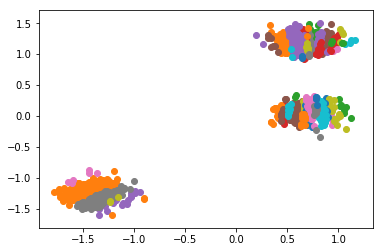

In [13]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

**Conclusion**:unique case of correct clustering with $K,K_{min}=(550,550)$.

### 2.4 uniform

In [14]:
X = DATA[3]
my_estimator = jp.jarvis_patrick(K=100,Kmin=100,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

KeyboardInterrupt: 

In [ ]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

## 3.0 JP variant

see Brown and Martin (Brown, R. D.; Martin. Y. C. Use of Structure-Activity Data To Compare Structure-Based Clustering Methods and Descriptors for Use in Compound Selection J. Chem. Inf. Comput. Sci. 1996, 36, 572-584); the original algorithm has the following shortcomings:

- nearest neighbors of equal similarity to others already in the list maybe excluded because the list already has K elements; this may subdivide large clusters consisting similar molecules.
- it has the tendency to produce too many singletons, because in many cases similar structures have less than Kmin nearest neighbors in common.

In [ ]:
plt.scatter(Xsimple[:,0],Xsimple[:,1])

In [ ]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xsimple))
D

In [ ]:
my_estimator = jp.brown_martin(T=2.,Rmin=0.5,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple)
ncl, nn, cl

### 3.1 circles

In [ ]:
X = DATA[0]
my_estimator = jp.brown_martin(T=0.9,Rmin=0.6,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

### 3.2 moons

In [ ]:
X = DATA[1]
my_estimator = jp.brown_martin(T=1.5,Rmin=0.75,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

### 3.3 blobs

In [ ]:
X = DATA[2]
my_estimator = jp.brown_martin(T=1.5,Rmin=0.75,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))

### 3.4 uniform

In [ ]:
X = DATA[3]
my_estimator = jp.brown_martin(T=1.5,Rmin=0.75,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

In [ ]:
for i in range(ncl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'))